<a href="https://colab.research.google.com/github/edgarbernaling-arch/Desafio_1_Ciencia_de_datos_Edgar_Bernal/blob/main/Copia_de_AluraStoreLatam_Challegue1_Ciencia_de_datos_Edgar_Bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [38]:
# 1. Calcular el ingreso total para cada tienda (suma de la columna 'Precio')
ingreso_total_tienda1 = tienda['Precio'].sum()
ingreso_total_tienda2 = tienda2['Precio'].sum()
ingreso_total_tienda3 = tienda3['Precio'].sum()
ingreso_total_tienda4 = tienda4['Precio'].sum()

# 2. Mostrar los resultados
print(f"Ingreso Total Tienda 1: {ingreso_total_tienda1:,.1f}")
print(f"Ingreso Total Tienda 2: {ingreso_total_tienda2:,.1f}")
print(f"Ingreso Total Tienda 3: {ingreso_total_tienda3:,.1f}")
print(f"Ingreso Total Tienda 4: {ingreso_total_tienda4:,.1f}")

Ingreso Total Tienda 1: 1,150,880,400.0
Ingreso Total Tienda 2: 1,116,343,500.0
Ingreso Total Tienda 3: 1,098,019,600.0
Ingreso Total Tienda 4: 1,038,375,700.0


### GRÁFICO:

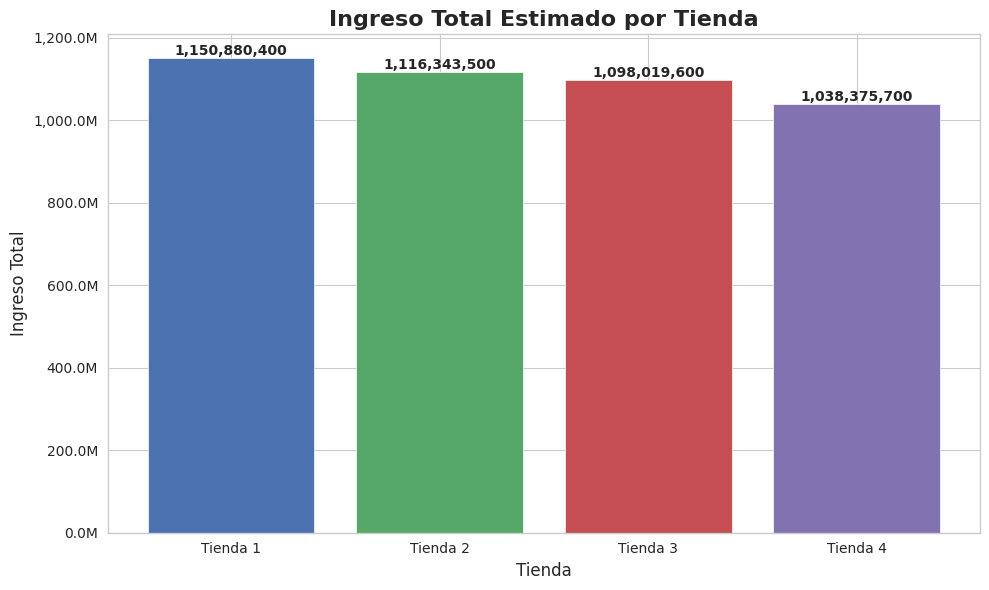

In [39]:
from matplotlib.ticker import FuncFormatter

# 1. Datos de ingresos totales (suma de la columna 'Precio')
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
}
df_ingresos = pd.DataFrame(data)

# 2. Configuración del gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 3. Crear el gráfico de barras
bars = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], color=['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# 4. Etiquetas y título
plt.title('Ingreso Total Estimado por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)

# Función para formatear el eje Y en millones (M)
def millions_formatter(x, pos):
    return f'{x/1e6:,.1f}M'
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# 5. Agregar el valor exacto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500000,
             f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [60]:
# Iterar sobre cada DataFrame para calcular y mostrar el conteo de ventas
for nombre_tienda, df in dataframes.items():
    # Agrupar por 'Categoría del Producto' y contar la columna 'Producto'
    df_conteo = df.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")

    # ORDENAR de mayor a menor (ascending=False)
    df_conteo = df_conteo.sort_values(by='Ventas', ascending=False)

    # Imprimir la tabla
    print(f"## 🛍️ {nombre_tienda}")
    print(df_conteo.to_markdown(index=False))
    print("-------------------------------------------------------------------")

## 🛍️ Tienda 1
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      465 |
| Electrónicos             |      448 |
| Juguetes                 |      324 |
| Electrodomésticos        |      312 |
| Deportes y diversión     |      284 |
| Instrumentos musicales   |      182 |
| Libros                   |      173 |
| Artículos para el hogar  |      171 |
-------------------------------------------------------------------
## 🛍️ Tienda 2
| Categoría del Producto   |   Ventas |
|:-------------------------|---------:|
| Muebles                  |      442 |
| Electrónicos             |      422 |
| Juguetes                 |      313 |
| Electrodomésticos        |      305 |
| Deportes y diversión     |      275 |
| Instrumentos musicales   |      224 |
| Libros                   |      197 |
| Artículos para el hogar  |      181 |
-------------------------------------------------------------------
## 🛍️ Tienda 3
| Categoría del Pro

### GRÁFICO:

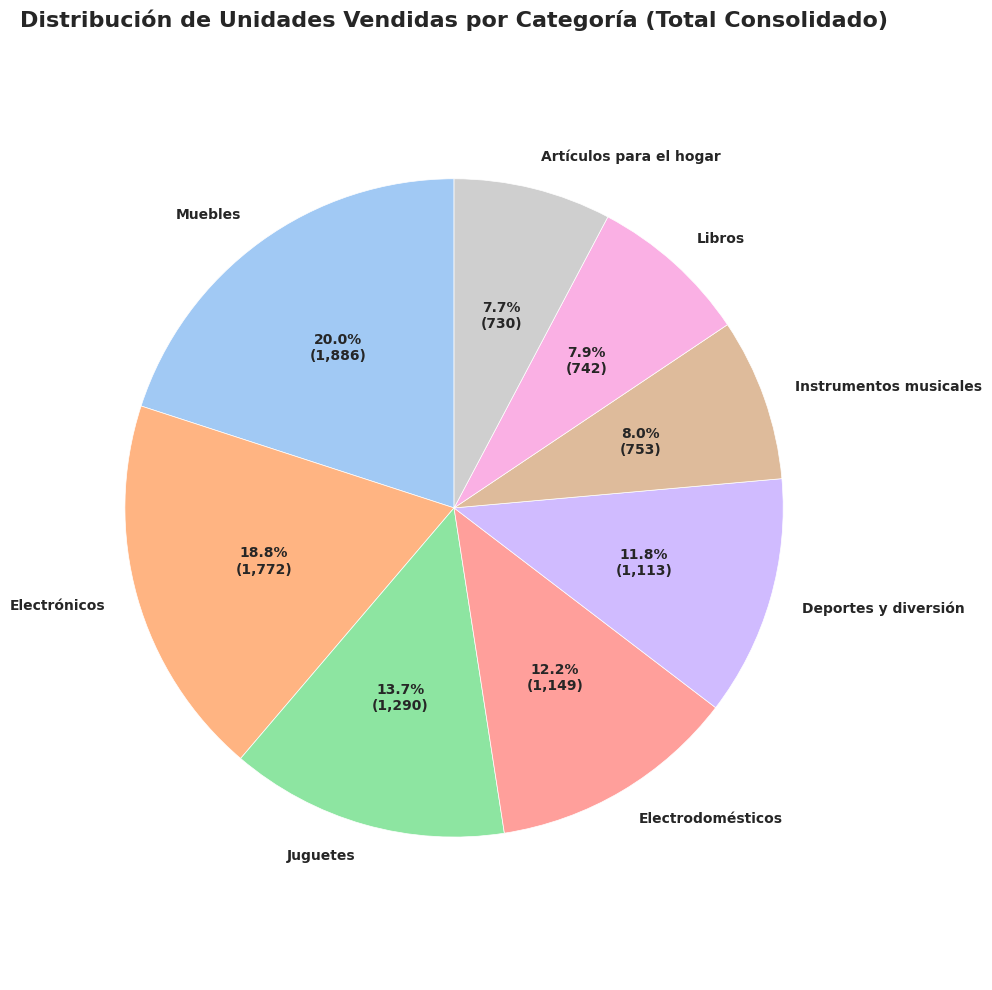

In [62]:
# Consolidar todas las tiendas
todas_las_tiendas = [tienda, tienda2, tienda3, tienda4]
df_consolidado = pd.concat(todas_las_tiendas, ignore_index=True)

# --- 2. CÁLCULO DE CONTEO POR CATEGORÍA Y DEFINICIÓN DE df_conteo_total ---

# Agrupar por 'Categoría del Producto' y contar la columna 'Producto'
# ESTO DEFINE la variable df_conteo_total que faltaba
df_conteo_total = df_consolidado.groupby('Categoría del Producto')['Producto'].count().reset_index(name="Ventas")
df_conteo_total = df_conteo_total.sort_values(by='Ventas', ascending=False)

# --- 3. VISUALIZACIÓN (GRÁFICO DE TORTA ÚNICO) ---

sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))

# Preparar los datos para el gráfico de torta
conteo = df_conteo_total['Ventas']
etiquetas = df_conteo_total['Categoría del Producto']

# Crear el gráfico de torta
plt.pie(
    conteo,
    labels=etiquetas,
    # Muestra el porcentaje (%.1f) y el conteo de unidades (unidades vendidas)
    autopct=lambda p: f'{p:.1f}%\n({round(p * sum(conteo) / 100):,})',
    startangle=90,
    colors=sns.color_palette("pastel"),
    textprops={'fontsize': 10, 'weight': 'bold'}
)

# Título
plt.title('Distribución de Unidades Vendidas por Categoría (Total Consolidado)', fontsize=16, fontweight='bold')
plt.axis('equal') # Asegura que la torta sea un círculo

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [42]:
df_list = []
for nombre, df in tiendas.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# 1. Asegurar que 'Calificación' sea numérica
df_consolidado['Calificación'] = pd.to_numeric(df_consolidado['Calificación'], errors='coerce')

# 2. Calcular la calificación promedio por tienda y ORDENAR por el nombre de la tienda
calificacion_por_tienda = df_consolidado.groupby('Tienda').agg(
    Calificacion_Promedio=('Calificación', 'mean')
).sort_values(
    by='Tienda',  # Ordenar por el nombre de la tienda (alfabéticamente: T1, T2, T3, T4)
    ascending=True
).reset_index()

# 3. Mostrar el resultado
print("Calificación Promedio de los Clientes por Tienda (Ordenado por Tienda):")
print(calificacion_por_tienda.to_markdown(index=False, floatfmt=".2f"))

KeyError: 'Calificación'

### GRÁFICO:

In [ ]:
plt.figure(figsize=(10,5))
# Trazar el gráfico de líneas con estilo personalizado
plt.plot(
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], promedios, marker='o')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Promedio de Calificación')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
df_consolidado = pd.concat(tiendas, ignore_index=True)

# 1. Agrupar por 'Producto' y contar el número de transacciones
# Usamos size() para contar cuántas veces aparece cada producto.
conteo_ventas = df_consolidado.groupby('Producto').size().reset_index(name='Cantidad de Transacciones')

# 2. Ordenar por la cantidad de transacciones
conteo_ventas_ordenado = conteo_ventas.sort_values(
    by='Cantidad de Transacciones',
    ascending=False
)

# 3. Mostrar el Top 10 de productos más vendidos
print("--- 🥇 Top 10 Productos Más Vendidos (Por Transacciones) ---")
print(conteo_ventas_ordenado.head(10).to_markdown(index=False))

print("\n--- 📉 Top 10 Productos Menos Vendidos (Por Transacciones) ---")
# 4. Mostrar el Bottom 10 de productos menos vendidos (simplemente invertimos el orden y tomamos el head)
print(conteo_ventas_ordenado.tail(10).to_markdown(index=False))

In [ ]:
tiendas_dict = {
    'Tienda 1': pd.read_csv(url1),
    'Tienda 2': pd.read_csv(url2),
    'Tienda 3': pd.read_csv(url3),
    'Tienda 4': pd.read_csv(url4)
}

# 2. Etiquetar y consolidar DataFrames (Resuelve el ValueError si se ejecuta junto)
df_list = []
for nombre, df in tiendas_dict.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# 3. Calcular el recuento de ventas por tienda y por producto
ventas_por_tienda_producto = df_consolidado.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# 4. Encontrar el producto MÁS y MENOS vendido por tienda
idx_max = ventas_por_tienda_producto.groupby(['Tienda'])['Cantidad de Ventas'].idxmax()
productos_mas_vendidos = ventas_por_tienda_producto.loc[idx_max].reset_index(drop=True)

idx_min = ventas_por_tienda_producto.groupby(['Tienda'])['Cantidad de Ventas'].idxmin()
productos_menos_vendidos = ventas_por_tienda_producto.loc[idx_min].reset_index(drop=True)

# 5. Mostrar los resultados
print('--- 🥇 Productos Más Vendidos por Tienda ---')
print(productos_mas_vendidos[['Tienda', 'Producto', 'Cantidad de Ventas']].to_markdown(index=False))

print('\n--- 📉 Productos Menos Vendidos por Tienda ---')
print(productos_menos_vendidos[['Tienda', 'Producto', 'Cantidad de Ventas']].to_markdown(index=False))

### GRÁFICO:

In [ ]:
df_list = []
for nombre, df in tiendas_dict.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# Calcular el recuento de ventas por tienda y por producto
ventas_por_tienda_producto = df_consolidado.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Encontrar el producto MÁS vendido por tienda
idx_max = ventas_por_tienda_producto.groupby(['Tienda'])['Cantidad de Ventas'].idxmax()
productos_mas_vendidos = ventas_por_tienda_producto.loc[idx_max]
productos_mas_vendidos['Tipo'] = 'Más Vendido'

# Encontrar el producto MENOS vendido por tienda
idx_min = ventas_por_tienda_producto.groupby(['Tienda'])['Cantidad de Ventas'].idxmin()
productos_menos_vendidos = ventas_por_tienda_producto.loc[idx_min]
productos_menos_vendidos['Tipo'] = 'Menos Vendido'

# Unir ambos DataFrames para el gráfico
df_grafico_comparativo = pd.concat([productos_mas_vendidos, productos_menos_vendidos])
df_grafico_comparativo['Etiqueta'] = df_grafico_comparativo['Producto'] + ' (' + df_grafico_comparativo['Cantidad de Ventas'].astype(str) + ')'


# --- 2. Generación del Gráfico de Barras Agrupadas ---
plt.figure(figsize=(12, 7))

sns.barplot(
    x='Tienda',
    y='Cantidad de Ventas',
    hue='Tipo', # Variable clave para agrupar las barras (Más vs Menos Vendido)
    data=df_grafico_comparativo,
    palette={'Más Vendido': '#4CAF50', 'Menos Vendido': '#E53935'} # Verde/Rojo
)

# Configuración y etiquetas
plt.title('Comparación de Productos Más y Menos Vendidos por Tienda', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor y producto sobre las barras
for p in plt.gca().patches:
    # Asegura que solo se etiqueten las barras de interés
    height = p.get_height()
    if pd.notna(height):
        # Obtener los datos originales para encontrar el nombre del producto
        tienda = p.get_x() + p.get_width() / 2

        # Buscar el producto y cantidad en el DataFrame original
        # Simplificación: solo se muestra el valor de la cantidad para no saturar
        plt.gca().text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9
        )

plt.legend(title='Tipo de Venta')
plt.show()

# 5. Envío promedio por tienda

In [ ]:
df_list = []
for nombre, df in tiendas_dict.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# 1. Asegurar que la columna 'Costo de envío' sea numérica
df_consolidado['Costo de envío'] = pd.to_numeric(
    df_consolidado['Costo de envío'],
    errors='coerce'
)

# 2. Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio_por_tienda = df_consolidado.groupby('Tienda').agg(
    Costo_Envio_Promedio=('Costo de envío', 'mean')
).sort_values(
    by='Costo_Envio_Promedio',
    ascending=False
).reset_index()

print('--- 🚚 Costo de Envío Promedio por Tienda ---')
print(envio_promedio_por_tienda.to_markdown(index=False, floatfmt=".2f"))

### GRÁFICO:

In [ ]:
df_list = []
for nombre, df in tiendas_dict.items():
    df['Tienda'] = nombre
    df_list.append(df)

df_consolidado = pd.concat(df_list, ignore_index=True)

# Convertir el 'Costo de envío' a numérico
df_consolidado['Costo de envío'] = pd.to_numeric(
    df_consolidado['Costo de envío'],
    errors='coerce'
)
# --- Fin de la preparación de datos ---

# 2. Generación del Box Plot CORREGIDO
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Tienda',
    y='Costo de envío',
    data=df_consolidado,
    palette='Pastel1',
    hue='Tienda',        # <-- CORRECCIÓN: Asignamos la variable del eje 'x' a 'hue'
    legend=False         # <-- Y desactivamos la leyenda
)

# Configuración y etiquetas
plt.title('Distribución del Costo de Envío por Tienda (Box Plot)', fontsize=16, weight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()